In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.stats import chi2_contingency
df = pd.read_csv("data.csv")
df


<ipython-input-2-f1815a0414e5>:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


1. Вывести информацию о наборе данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками.


In [4]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df.loc[df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = np.nan
df['Num_of_Delayed_Payment']

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

3. В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

In [5]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).

In [6]:
df["Credit_History_Age"] = df["Credit_History_Age"].apply(lambda x: None if pd.isna(x) else int(x.split(' ')[3]))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,1.0,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,3.0,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,4.0,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,5.0,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,6.0,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,7.0,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,8.0,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,9.0,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков.Заменить аномальные значения пропусками.

In [7]:
# 1. Определим логические ограничения
# Обычно количество банковских счетов не может быть отрицательным или очень большим.
logical_anomalies = (df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > 50)  # Пример, более 50 счетов считаем аномалией

# 2. Метод IQR для определения выбросов
Q1 = df['Num_Bank_Accounts'].quantile(0.25)
Q3 = df['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1
IQR_anomalies = (df['Num_Bank_Accounts'] < (Q1 - 1.5 * IQR)) | (df['Num_Bank_Accounts'] > (Q3 + 1.5 * IQR))

# Объединяем все аномалии
anomalies = logical_anomalies | IQR_anomalies

# Заменяем аномальные значения на NaN
df.loc[anomalies, 'Num_Bank_Accounts'] = np.nan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         98664 non-null   float64
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

6. Восстановить пропущенные значения признака.
Сравнить распределения признака до и после восстановления.Для всех вариантов восстановить пропущенные значения признака Type_of_Loan.

In [ ]:
# Преобразование столбцов в числовые, приведение ошибок к NaNdf['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Скопируйте df для сравнения до и после вменения
df_before_imputation = df[['Num_of_Delayed_Payment', 'Amount_invested_monthly']].copy()

# Вменить пропущенные значения средним значениемdf['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean(), inplace=True)
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean(), inplace=True)

# Копируем df после вменения
df_after_imputation = df[['Num_of_Delayed_Payment', 'Amount_invested_monthly']].copy()

# Постройте распределения до и после вменения
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Распределение Num_of_Delayed_Payment до и после вменения
sns.histplot(df_before_imputation['Num_of_Delayed_Payment'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Num_of_Delayed_Payment - Before Imputation')
sns.histplot(df_after_imputation['Num_of_Delayed_Payment'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Num_of_Delayed_Payment - After Imputation')

# Распределение Amount_invested_monthly до и после вменения
sns.histplot(df_before_imputation['Amount_invested_monthly'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Amount_invested_monthly - Before Imputation')
sns.histplot(df_after_imputation['Amount_invested_monthly'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Amount_invested_monthly - After Imputation')

plt.tight_layout()
plt.show()

# Импутация пропущенных значений в 'Type_of_Loan'
mode_type_of_loan = df['Type_of_Loan'].mode()[0]
df['Type_of_Loan'].fillna(mode_type_of_loan, inplace=True)


7. Определить наличие статистических выбросов.
Использовать графический и статистический методы.


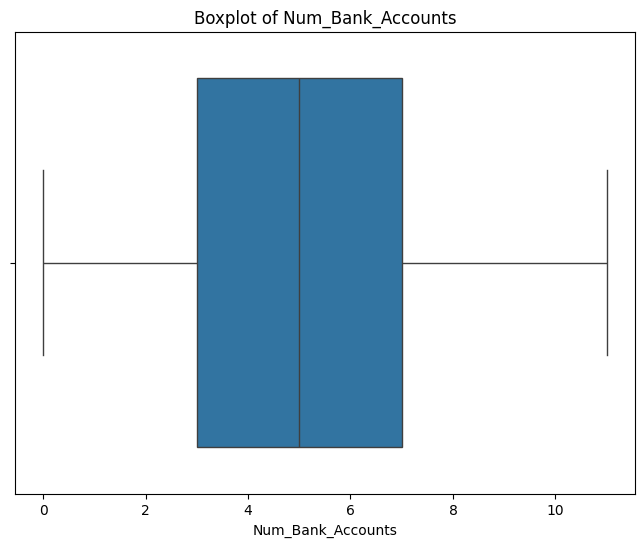

In [9]:
# Графический метод: ящик с усами (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Num_Bank_Accounts'])
plt.title('Boxplot of Num_Bank_Accounts')
plt.xlabel('Num_Bank_Accounts')
plt.show()

In [10]:
# Статистический метод: межквартильный размах (IQR)
Q1 = df['Num_Bank_Accounts'].quantile(0.25)
Q3 = df['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Num_Bank_Accounts'] < lower_bound) | (df['Num_Bank_Accounts'] > upper_bound)]
print("Статистические выбросы:")
outliers


Статистические выбросы:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


8. Закодировать категориальные признаки.

In [11]:
from sklearn.preprocessing import LabelEncoder
# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки
credit_score_label_encoded = label_encoder.(df['Credit_Score'])

# Создаем новый столбец с закодированными значениями
df['Credit_Score_LabelEncoded'] = credit_score_label_encoded
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_LabelEncoded
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,809.98,26.822620,1.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,809.98,28.609352,3.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,809.98,31.377862,4.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,809.98,24.797347,5.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,502.38,34.663572,6.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,502.38,40.565631,7.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.65161,Poor,1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,502.38,41.255522,8.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,1
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,502.38,33.638208,9.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,2


9. Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости.

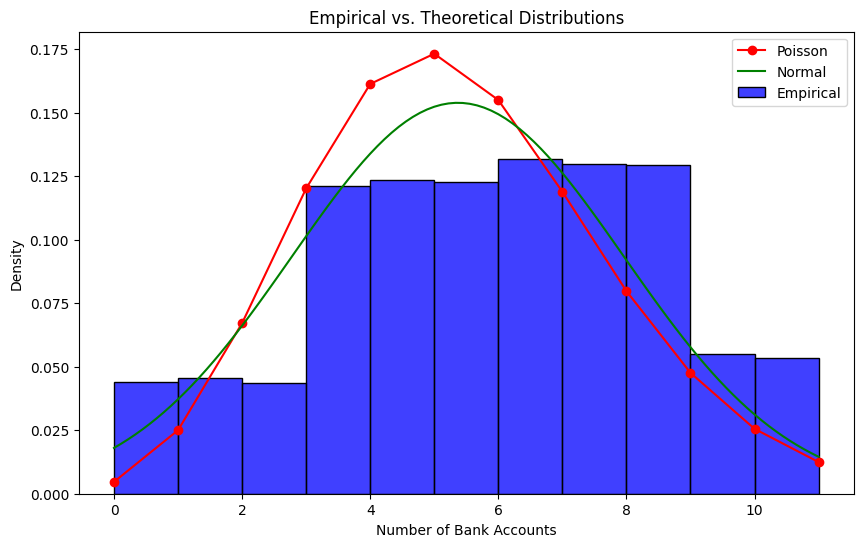

(44685.69298087339, 0.0, 10046.682971955788, 0.0)

In [12]:
from scipy.stats import poisson, norm, chisquare
# Извлечение соответствующего столбца и преобразование в целые числа
num_bank_accounts = df['Num_Bank_Accounts'].dropna().astype(int)

# Расчет параметров для распределений
mean = num_bank_accounts.mean()
std_dev = num_bank_accounts.std()

# Генерация теоретических распределений
poisson_dist = poisson(mu=mean)
norm_dist = norm(loc=mean, scale=std_dev)

# Построение гистограммы эмпирического распределения и теоретических распределений
plt.figure(figsize=(10, 6))

# Эмпирическое распределение
sns.histplot(num_bank_accounts, bins=range(int(num_bank_accounts.min()), int(num_bank_accounts.max()) + 1), kde=False, stat='density', label='Empirical', color='blue')

# Теоретическое пуассоновское распределение
x_poisson = np.arange(0, num_bank_accounts.max() + 1)
plt.plot(x_poisson, poisson_dist.pmf(x_poisson), 'o-', label='Poisson', color='red')

# Теоретическое нормальное распределение
x_norm = np.linspace(num_bank_accounts.min(), num_bank_accounts.max(), 100)
plt.plot(x_norm, norm_dist.pdf(x_norm), '-', label='Normal', color='green')

plt.xlabel('Number of Bank Accounts')
plt.ylabel('Density')
plt.title('Empirical vs. Theoretical Distributions')
plt.legend()
plt.show()

# Частоты для эмпирических данных
observed_freq, bins = np.histogram(num_bank_accounts, bins=range(int(num_bank_accounts.min()), int(num_bank_accounts.max()) + 2))

# Ожидаемые частоты для пуассоновского распределения
expected_freq_poisson = [poisson_dist.pmf(k) * len(num_bank_accounts) for k in range(int(num_bank_accounts.min()), int(num_bank_accounts.max()) + 1)]
expected_freq_poisson = np.array(expected_freq_poisson) * (sum(observed_freq) / sum(expected_freq_poisson))

# Ожидаемые частоты для нормального распределения
expected_freq_norm = [norm_dist.pdf(k) * len(num_bank_accounts) for k in range(int(num_bank_accounts.min()), int(num_bank_accounts.max()) + 1)]
expected_freq_norm = np.array(expected_freq_norm) * (sum(observed_freq) / sum(expected_freq_norm))

# Тест Хи-квадрат для пуассоновского распределения
chi2_poisson, p_poisson = chisquare(f_obs=observed_freq, f_exp=expected_freq_poisson)

# Тест Хи-квадрат для нормального распределения
chi2_norm, p_norm = chisquare(f_obs=observed_freq, f_exp=expected_freq_norm)

chi2_poisson, p_poisson, chi2_norm, p_norm


10. Выбрать любые два количественных признака и оценить наличие и степень их зависимости.
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла.
Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.


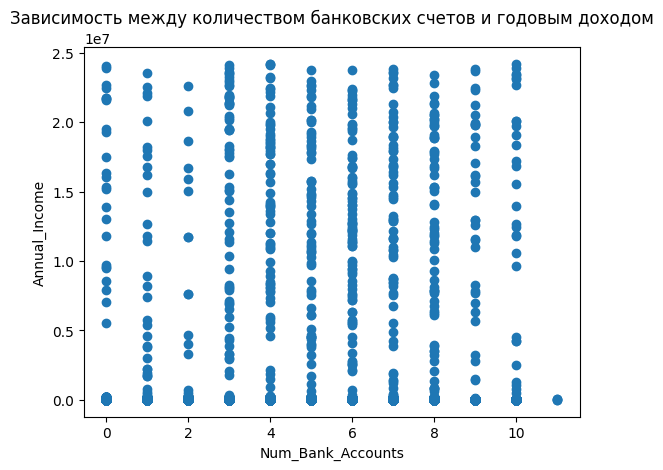

Коэффициент корреляции Пирсона: -0.008206397602069137
Коэффициент корреляции Спирмена:t: -0.26470174387728673
Коэффициент корреляции Кендалла: -0.18700962284830433


In [18]:
# Отображение зависимости между Num_Bank_Accounts и Annual_Income
plt.scatter(df['Num_Bank_Accounts'], df['Annual_Income'])
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Annual_Income')
plt.title('Зависимость между количеством банковских счетов и годовым доходом')
plt.show()
def pearson_corr(x, y):
    """Рассчитывает коэффициент корреляции Пирсона"""
    return np.corrcoef(x, y)[0, 1]

def spearman_corr(x, y):
    """Рассчитывает коэффициент корреляции Спирмена"""
    return x.corr(y, method='spearman')

def kendall_corr(x, y):
    """Рассчитывает коэффициент корреляции Кендалла"""
    return x.corr(y, method='kendall')
# Рассчет коэффициентов корреляции
pearson_coef = pearson_corr(df['Num_Bank_Accounts'], df['Annual_Income'])
spearman_coef = spearman_corr(df['Num_Bank_Accounts'], df['Annual_Income'])
kendall_coef = kendall_corr(df['Num_Bank_Accounts'], df['Annual_Income'])

print("Коэффициент корреляции Пирсона:", pearson_coef)
print("Коэффициент корреляции Спирмена:t:", spearman_coef)
print("Коэффициент корреляции Кендалла:", kendall_coef)


ВЫВОД: Все три метода расчета корреляции (Пирсон, Спирмен, Кендалл) демонстрируют очень слабую положительную зависимость между переменными. Это означает, что изменения в одной переменной лишь незначительно влияют на другую переменную.

11. Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости.
Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод.
Написать функцию для расчета корреляционного отношения.
Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.


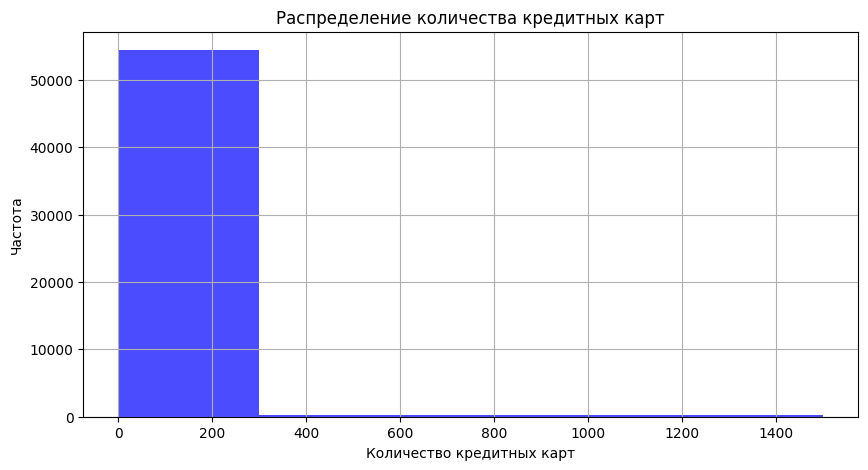

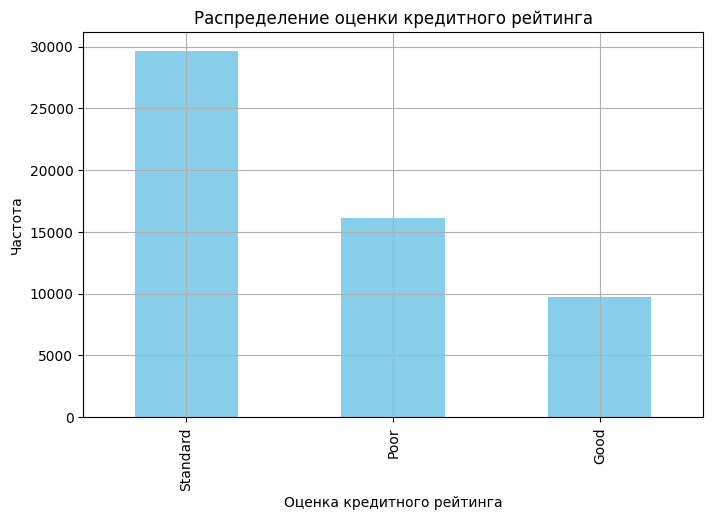

<Figure size 1000x600 with 0 Axes>

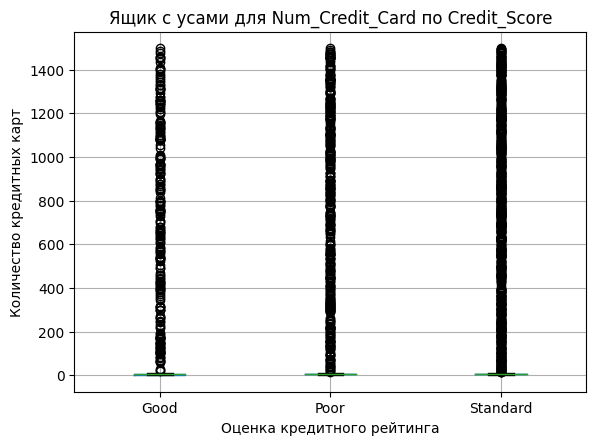

Корреляционное отношение между Credit_Score и Num_Credit_Card: 0.00013031436348000353
Зависимость очень слабая или отсутствует.


In [15]:
# Гистограмма для Num_Credit_Card
plt.figure(figsize=(10, 5))
plt.hist(df['Num_Credit_Card'], bins=5, color='blue', alpha=0.7)
plt.title('Распределение количества кредитных карт')
plt.xlabel('Количество кредитных карт')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Гистограмма для Credit_Score
plt.figure(figsize=(8, 5))
df['Credit_Score'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение оценки кредитного рейтинга')
plt.xlabel('Оценка кредитного рейтинга')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Ящик с усами для Num_Credit_Card по Credit_Score
plt.figure(figsize=(10, 6))
bp = df.boxplot(column='Num_Credit_Card', by='Credit_Score')
plt.title('Ящик с усами для Num_Credit_Card по Credit_Score')
plt.xlabel('Оценка кредитного рейтинга')
plt.ylabel('Количество кредитных карт')

# Изменяем заголовок
bp.get_figure().suptitle('')

plt.show()

# Функция для расчета корреляционного отношения

def correlation_ratio(categories, measurements):
    categories = pd.Series(categories)
    measurements = pd.Series(measurements)

    unique_categories = categories.unique()
    num_categories = len(unique_categories)

    # Средние значения для каждой категории
    means = [measurements[categories == category].mean(None) for category in unique_categories]

    # Общее среднее значение
    grand_mean = measurements.mean()

    # Внутригрупповая сумма квадратов отклонений
    numerator = sum([len(measurements[categories == category]) * (means[i] - grand_mean)**2 for i, category in enumerate(unique_categories)])

    # Общая сумма квадратов отклонений
    denominator = sum((measurements - grand_mean)**2)

    # Коэффициент V Крамера
    eta_squared = numerator / denominator

    return eta_squared

# Рассчитаем корреляционное отношение между Num_Credit_Card и Credit_Score
correlation = correlation_ratio(df['Credit_Score'], df['Num_Credit_Card'])
print(f"Корреляционное отношение между Credit_Score и Num_Credit_Card: {correlation}")

# Интерпретация
if correlation < 0.1:
    print("Зависимость очень слабая или отсутствует.")
elif 0.1 <= correlation < 0.3:
    print("Есть небольшая зависимость.")
elif 0.3 <= correlation < 0.5:
    print("Средняя зависимость.")
else:
    print("Значительная зависимость.")

ВЫВОД: На основании визуального анализа и расчета корреляционного отношения можно сделать вывод, что между оценкой кредитного рейтинга и количеством кредитных карт нет заметной зависимости. Таким образом, количество кредитных карт, скорее всего, не зависит от категории кредитного рейтинга

12. Выбрать любые два категориальных признака и оценить наличие и степень их зависимости.

Cramer's V: 0.03177566937225373
Contingency Coefficient: 0.04489227801381532
Tschuprow's T: 0.019201245135174082
Pearson's Contingency: 0.019201245135174082


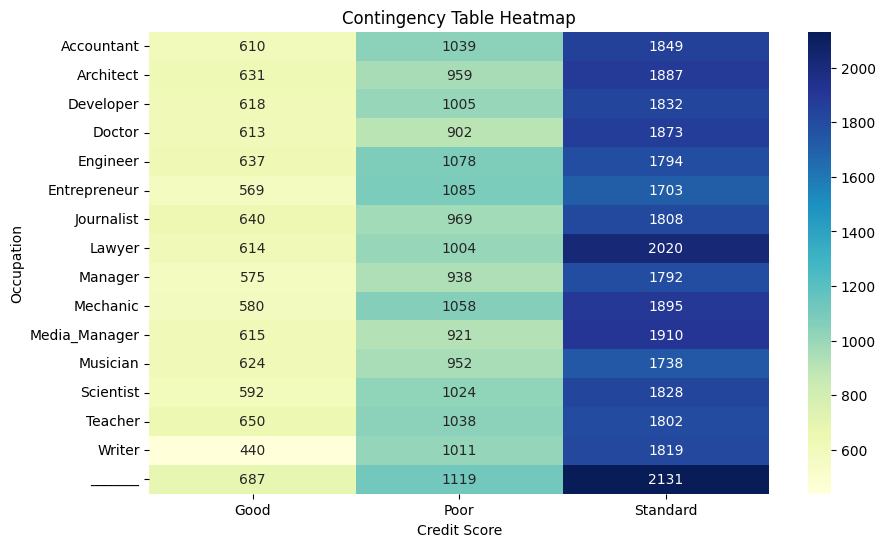

In [16]:
# Расчет таблицы сопряженности
contingency_table = pd.crosstab(df['Occupation'], df['Credit_Score'])

# Определение функций для расчета коэффициентов
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def contingency_coefficient(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (chi2 + n))

def tschuprows_t(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k, r = confusion_matrix.shape
    return np.sqrt(chi2 / (n * np.sqrt((k - 1) * (r - 1))))

def pearsons_contingency(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k, r = confusion_matrix.shape
    return np.sqrt(chi2 / (n * np.sqrt((k - 1) * (r - 1))))

# Расчет коэффициентов
cramers_v_value = cramers_v(contingency_table)
contingency_coefficient_value = contingency_coefficient(contingency_table)
tschuprows_t_value = tschuprows_t(contingency_table)
pearsons_contingency_value = pearsons_contingency(contingency_table)

# Вывод результатов
print(f"Cramer's V: {cramers_v_value}")
print(f"Contingency Coefficient: {contingency_coefficient_value}")
print(f"Tschuprow's T: {tschuprows_t_value}")
print(f"Pearson's Contingency: {pearsons_contingency_value}")

# Визуализация таблицы сопряженности
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Тепловая карта таблицы непредвиденных обстоятельств')
plt.xlabel('Credit Score')
plt.ylabel('Occupation')
plt.show()